<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Coding_test/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4_A_to_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 프로세스 A to Z


## section1. 머신러닝 프로세스

- Data set 분할
  - training:validation:test = 70-90 : 10-20 : 10-20
  - validation set 없이 학습데이터와 테스트 데이터로 진행하는 경우가 많음 => 8:2
  - 학습 데이터를 그룹으로 나누어서 cross validation하는 경우도 많이 사용됨
- 데이터 전처리
  - feature 표준화/정규화 (MinMaxScaler, StandardScaler)
    - 정규화: feature들의 단위가 다르기 때문에 생기는 문제 해결하기 위해 단위 통일
  - 범주형 변수 더미화 (One-Hot or multinomial) <= 데이터 분할 전에 할 것!!
  - 고차원의 경우 PCA 방법 등으로 차원 축소
- 모델 적용
  - regression/classification/Unsupervised 등 알고리즘으로 학습
    - 대부분의 알고리즘은 회귀, 분류에 모두 가능하지만 로지스틱처럼 분류에만 적합하거나 릿지, 라소, 엘라스틱넷과 같이 회귀에 적합한 경우도 있음
    - 여러 알고리즘 병합한 emsemble 고려해보기
  - 학습된 모델에 검증 데이터로 평가
  - 정확도, overfitting/underfitting 체크
    - 분류모델: confusion matrix
    - 회귀모델: R^2, RMSE
  - 하이퍼 파라미터 조장 통한 최적 모델 결정
    - Grid search: 분석자가 몇 가지 임의의 파라미터 설정하여 그 결과 중 가장 좋은 모델평가지표 선정
    - Random search: 분석자가 설정한 일정 범위 이내에 무작위로 하이퍼 파라미터 뽑아서 최적 결과 도출
- Hyper parameters 탐색 및 결정
  - 최종 분류기에서 검증셋은 사용하지 않는 것이 좋음
  - 최종 모델을 test set에 대해 성능 평가
  - test set에 대한 정확도 제시


## section2. 데이터셋 분할과 모델 검증

### 구글 드라이브 마운트해서 데이터 가져오기

(colab 환경이 아닌 분들은 필요없는 과정입니다!)

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import shutil
import os

try:
    dataset_path = '/content/gdrive/MyDrive/CodingTest/data_science/data_수정본'

    shutil.copy(os.path.join(dataset_path, 'Fvote.csv'), '/content')

except Exception as err:
    print(str(err))

In [ ]:
# 분석 결과 외에 다른 것 출력 안 하는 옵션인데 할 필요 없음  나도 잘 안 함..
import warnings 
warnings.filterwarnings("ignore")


import pandas as pd

data = pd.read_csv("Fvote.csv", encoding = "utf-8")
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [ ]:
# 데이터 확인

print(data.describe().T)

                    count      mean       std  min  25%  50%  75%  max
gender_female       211.0  0.341232  0.475251  0.0  0.0  0.0  1.0  1.0
gender_male         211.0  0.658768  0.475251  0.0  0.0  1.0  1.0  1.0
region_Chungcheung  211.0  0.080569  0.272819  0.0  0.0  0.0  0.0  1.0
region_Honam        211.0  0.090047  0.286930  0.0  0.0  0.0  0.0  1.0
region_Others       211.0  0.094787  0.293617  0.0  0.0  0.0  0.0  1.0
region_Sudo         211.0  0.597156  0.491636  0.0  0.0  1.0  1.0  1.0
region_Youngnam     211.0  0.137441  0.345131  0.0  0.0  0.0  0.0  1.0
edu                 211.0  1.867299  0.625963  1.0  1.0  2.0  2.0  3.0
income              211.0  2.208531  1.066424  1.0  1.0  2.0  3.0  4.0
age                 211.0  2.654028  0.872173  1.0  2.0  3.0  3.0  4.0
score_gov           211.0  3.056872  0.944451  1.0  3.0  3.0  4.0  5.0
score_progress      211.0  3.094787  0.961408  1.0  2.0  3.0  4.0  5.0
score_intention     211.0  2.910900  0.725078  1.0  2.4  3.0  3.4  5.0
vote  

In [ ]:
# 요약정보 확인

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender_female       211 non-null    int64  
 1   gender_male         211 non-null    int64  
 2   region_Chungcheung  211 non-null    int64  
 3   region_Honam        211 non-null    int64  
 4   region_Others       211 non-null    int64  
 5   region_Sudo         211 non-null    int64  
 6   region_Youngnam     211 non-null    int64  
 7   edu                 211 non-null    int64  
 8   income              211 non-null    int64  
 9   age                 211 non-null    int64  
 10  score_gov           211 non-null    int64  
 11  score_progress      211 non-null    int64  
 12  score_intention     211 non-null    float64
 13  vote                211 non-null    int64  
 14  parties             211 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 24.9 KB
None


### Feature, Target 분리하기

In [ ]:
X_data = data.drop(columns = 'vote')
y_data = data[['vote']]

### 방법1: train-test set 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    stratify = y_data, # 비율 맞추기 위함
                                                    random_state = 56,
                                                    test_size = 0.2)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168, 14) (43, 14) (168, 1) (43, 1)


- 모델 적용

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

#### cross_val_score

- 랜덤 없는 교차검증
- 데이터를 순서대로 k 분할

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

score = cross_val_score(model, X_train, y_train, cv = 5)

print("5-fold 정확도:", score)
print("정확도 평균:", score.mean())

5-fold 정확도: [0.76470588 0.61764706 0.67647059 0.81818182 0.63636364]
정확도 평균: 0.7026737967914438


#### k-fold cross validation
  - 랜덤 있는 교차검증
  - 오버피팅 혹은 언더피팅을 막기 위해 사용
  - cross_val_score(model, X, y, cv = ) 형태

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state = 56) # bias 줄이기 위해 shuffle = True 데이터 섞어서 추출

score = cross_val_score(model, X_train, y_train, cv = kfold)

print("5-fold 정확도:", score)
print("정확도 평균:", score.mean())

5-fold 정확도: [0.73529412 0.55882353 0.67647059 0.78787879 0.75757576]
정확도 평균: 0.7032085561497328


### 방법2: train-validation-test 나누기

- 딥러닝은 데이터 수가 많아 이렇게 세 그룹으로 나누는데, 머신러닝에서는 데이터 수에 따라 융통성 있게 사용
- 먼저 train:test로 나눈 후 train을 다시 train:valid로 분할함
- 빅데이터 분석기사 시험이나 일반 기업 코딩 테스트에선 test셋이 미리 주어지기 때문에 train, val만 나누면 될 듯? 전자는 확실한데 후자는 모름..

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data,
                                                            stratify = y_data,
                                                            random_state = 56, test_size = 0.2)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  stratify = y_train_val,
                                                  random_state = 56, test_size = 0.2)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape,'\n', y_train.shape, y_val.shape, y_test.shape)
# 65:15:20 정도로 쪼개짐

(134, 14) (34, 14) (43, 14) 
 (134, 1) (34, 1) (43, 1)


In [ ]:
# 랜덤없는 교차검증

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

model.fit(X_train, y_train)

score = cross_val_score(model, X_train, y_train, cv = 5)

print("교차검증 정확도:", score)
print("교차검증 정확도 평균:", score.mean())

교차검증 정확도: [0.74074074 0.66666667 0.59259259 0.62962963 0.73076923]
교차검증 정확도 평균: 0.6720797720797721


In [ ]:
# 랜덤있는 교차검증

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

model = LogisticRegression()

model.fit(X_train, y_train)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 56)
score = cross_val_score(model, X_train, y_train, cv = kfold)

print("교차검증 정확도:", score)
print("교차검증 정확도 평균:", score.mean())

교차검증 정확도: [0.59259259 0.7037037  0.55555556 0.7037037  0.80769231]
교차검증 정확도 평균: 0.6726495726495726


In [ ]:
# validation set 정확도
model.score(X_val, y_val)

0.6764705882352942

In [ ]:
# test set 정확도
model.score(X_test, y_test)

0.6511627906976745

- 결과적으로 65~75% 수준으로 정확도 수준은 낮지만, 과대적합될 가능성을 이미 교차검증에서 확인함 

## section3. model fitting과 tuning

- Hyper parameter 찾는 모델 튜닝

In [ ]:
# train test set 7:3 분리하고 시작
from sklearn.model_selection import train_test_split # 중복된 코드를 계속 적는 이유는 요즘 딥러닝만 하다보니 ML이 손에 안 익어서 일부러 쓰는 거

X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data,
                                                    stratify = y_data, 
                                                    random_state = 56, test_size = 0.3)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  stratify = y_train_val,
                                                  random_state = 56, test_size = 0.3)

X_train
# 디폴트가 7:3이라 0.3 굳이 안 써도 되는데 난 그냥.. 습관임

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,parties
192,1,0,1,0,0,0,0,1,1,1,3,4,2.8,4
108,0,1,0,0,0,1,0,2,3,2,2,1,3.0,2
172,0,1,0,0,0,1,0,2,1,2,3,3,2.6,4
41,0,1,0,1,0,0,0,3,3,4,4,2,4.0,4
132,1,0,0,0,0,1,0,1,1,2,2,2,2.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0,1,0,0,0,1,0,2,3,3,3,3,3.2,4
137,1,0,0,0,0,1,0,2,2,2,3,3,3.6,4
76,0,1,0,0,0,0,1,3,2,3,3,3,2.8,4
184,0,1,0,0,0,0,1,1,1,2,1,4,2.8,4


### Grid search

- 그리드서치는 분석가가 하이퍼파라미터의 특정 값을 지정하고, 각 모델에 적용하여 모델 적합도를 비교하는 방법임
- 하이퍼파라미터와 그리드서치 형식
  - param_grid = {'hyperparameter': [value1, value2, value3, ..., valuen]}
  - GridSearchCV(model명(), param_grid, cv = , return_train_score=True)
  - cv와 return_train_score는 옵션임! 안 넣어도 됨
  - return_train_score=Ture: 훈련 정확도 결과 제시 디폴트는 False

+혹시 빅데이터 분석기사 준비하는 분들이 볼까봐 적는데, 시험장에선 그리드 서치랑 cv하면 시간 초과날 가능성이 크므로 몇 개만 대입해보고 가장 좋은 모델 셀렉하는 것을 추천드립니다. 러닝타임 초과되면 당연 0점이고, 코드 작성할 땐 돌아갔는지 어쨌는지 기억이 안 나네요.. 아무튼 저는 몇 개 씩 끊어서 쭈욱 돌린 후 최종 결과는 하이퍼파라미터를 직접 대입하는 방법을 사용했습니다.
그래도 정확도가 낮아서 불합일 줄 알았는데 시험 끝나고 커뮤니티 보니 제가 제일 높더라구요. 이렇게 사용해보시는 거 추천드립니다~!

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
from sklearn.linear_model import LogisticRegression

# cv=5, return_train_score = True
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid  = param_grid,
                           cv = 5, # 옵션
                           return_train_score = True) # 옵션

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

- 정확도 가장 높은 하이퍼파라미터는 grid_search.best_params_로 확인
- 그 때의 정확도는 grid_search.best_socre_로 확인

In [ ]:
print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.3f}")

Best Parameter: {'C': 1}
Best Score: 0.774


In [ ]:
# validation셋에 C = 0.1 적용하기
print(f"Test set socre: {grid_search.score(X_val, y_val):.3f}") # fit 아니고 score임!!

Test set socre: 0.711


- 하이퍼 파라미터 별, cross validation 별 상세 결과값은 'grid_search.cv_resilts_'

In [ ]:
# 하이퍼파라미터별, CV 별 결과값 보기

result = grid_search.cv_results_
pd.DataFrame(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005556,0.000730,0.001562,0.000090,0.001,{'C': 0.001},0.714286,0.714286,0.70,0.70,...,0.715714,0.018295,5,0.716049,0.716049,0.719512,0.719512,0.707317,0.715688,0.004463
1,0.005881,0.000154,0.001727,0.000101,0.01,{'C': 0.01},0.714286,0.714286,0.70,0.70,...,0.715714,0.018295,5,0.716049,0.716049,0.719512,0.719512,0.707317,0.715688,0.004463
2,0.007659,0.000254,0.002279,0.000708,0.1,{'C': 0.1},0.809524,0.714286,0.65,0.70,...,0.734762,0.061086,4,0.728395,0.765432,0.756098,0.768293,0.780488,0.759741,0.017503
3,0.012041,0.001077,0.002089,0.000098,1,{'C': 1},0.857143,0.761905,0.70,0.75,...,0.773810,0.052511,1,0.790123,0.802469,0.853659,0.829268,0.817073,0.818519,0.021983
4,0.016762,0.002549,0.002270,0.000292,10,{'C': 10},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.829268,0.816170,0.017452
5,0.017914,0.000803,0.002188,0.000204,100,{'C': 100},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.841463,0.818609,0.019806


- plot으로 하이퍼파라미터 별로 훈련셋과 테스트셋 정확도 살펴보기

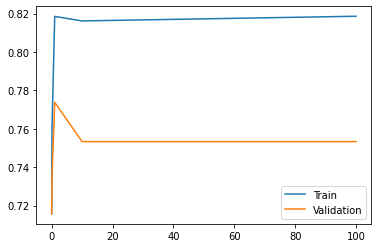

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result['param_C'], result['mean_train_score'], label = 'Train')
plt.plot(result['param_C'], result['mean_test_score'], label = 'Validation')
plt.legend()

### Random search

- 범위를 정하고 그 안에서 무작위로 하이퍼파라미터를 찾음
- 랜덤하게 뽑아야 하니 randint 라이브러리 사용함
- 무작위로 많이 찾아 돌려보는  greedy 방법이라 컴퓨팅 인프라 필요함

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'C': randint(low = 0.001, high = 100)}

In [ ]:
# model fitting

from sklearn.linear_model import LogisticRegression

random_search = RandomizedSearchCV(LogisticRegression(),
                                   param_distributions = param_distribs,
                                   cv = 5, # 옵션
                                   n_iter = 10, # 디폴트 10
                                   return_train_score = True) # 옵션

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe501924c50>},
                   return_train_score=True)

In [ ]:
print(f"Best Parameter: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_ :.3f}")

Best Parameter: {'C': 7}
Best CV score: 0.763


In [ ]:
print(f"Test set Score: {random_search.score(X_val, y_val) :.3f}") # fit 아니고 score임!!

Test set Score: 0.644


In [ ]:
# 상세값 출력

result = random_search.cv_results_
pd.DataFrame(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.034612,0.011314,0.002539,0.000164,23,{'C': 23},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.841463,0.818609,0.019806
1,0.032314,0.011008,0.002174,0.000321,60,{'C': 60},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.841463,0.818609,0.019806
2,0.015517,0.002451,0.001607,0.000040,10,{'C': 10},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.829268,0.816170,0.017452
3,0.016732,0.002900,0.001832,0.000311,39,{'C': 39},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.841463,0.818609,0.019806
4,0.024391,0.006887,0.001927,0.000346,88,{'C': 88},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.841463,0.818609,0.019806
5,0.019022,0.003394,0.001718,0.000319,20,{'C': 20},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.841463,0.818609,0.019806
6,0.014914,0.002795,0.001616,0.000120,12,{'C': 12},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.829268,0.816170,0.017452
7,0.016588,0.000905,0.001585,0.000032,49,{'C': 49},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.841463,0.818609,0.019806
8,0.015978,0.002011,0.001555,0.000042,23,{'C': 23},0.904762,0.761905,0.60,0.75,...,0.753333,0.096475,2,0.790123,0.839506,0.804878,0.817073,0.841463,0.818609,0.019806
9,0.014389,0.000500,0.001486,0.000101,7,{'C': 7},0.904762,0.761905,0.65,0.75,...,0.763333,0.081491,1,0.790123,0.839506,0.804878,0.817073,0.829268,0.816170,0.017452


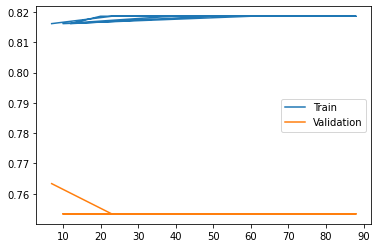

In [ ]:
# 그래프 출력
import matplotlib.pyplot as plt

plt.plot(result['param_C'], result['mean_train_score'], label = "Train")
plt.plot(result['param_C'], result['mean_test_score'], label = "Validation")
plt.legend()

## section4. model evaluation

In [ ]:
# 위에서 best로 뽑힌 C = 0.1 사용하여 모델 학습하기

fin_model = LogisticRegression(C = 0.1)
fin_model.fit(X_train, y_train)

y_train_pred = fin_model.predict(X_train)
y_val_pred = fin_model.predict(X_val)

In [ ]:
# 모델 평가하기
from sklearn.metrics import accuracy_score

print(accuracy_score(y_val, y_val_pred))

0.7111111111111111


### 혼동행렬 및 모델 평가

In [ ]:
# train set의 혼동행렬, 모델 평가
from sklearn.metrics import confusion_matrix, classification_report

confusion_train = confusion_matrix(y_train, y_train_pred)
print(confusion_train)
print('='*56)
creport_train = classification_report(y_train, y_train_pred)
print(creport_train)

# 투표 안 한 사람이 29명 중 6만 제대로 예측해냄.. 투표 안 할지에 대한 예측이 어렵다는 것을 알 수 있음.

[[ 6 23]
 [ 1 72]]
              precision    recall  f1-score   support

           0       0.86      0.21      0.33        29
           1       0.76      0.99      0.86        73

    accuracy                           0.76       102
   macro avg       0.81      0.60      0.60       102
weighted avg       0.79      0.76      0.71       102



In [ ]:
# validation set의 혼동행렬, 모델 평가
from sklearn.metrics import confusion_matrix, classification_report

confusion_val = confusion_matrix(y_val, y_val_pred)
print(confusion_val)
print('='*56)
creport_val = classification_report(y_val, y_val_pred)
print(creport_val)

# 역시나 투표 안 한 사람들을 예측하지 못하고 있음

[[ 1 12]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.72      0.97      0.83        32

    accuracy                           0.71        45
   macro avg       0.61      0.52      0.48        45
weighted avg       0.66      0.71      0.63        45



### ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train, y_train_pred))
print(roc_auc_score(y_val, y_val_pred))

0.5965989607935758
0.5228365384615384


In [ ]:
# sklearn에서 plot 기능은 제공하지 않기 때문에 따로 그려야함

from sklearn.metrics import roc_curve, auc

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_val, fin_model.decision_function(X_val))

roc_auc = roc_auc_score(y_val, y_val_pred)

In [ ]:
fin_model.decision_function(X_val)

array([ 0.47163822,  1.06077357,  1.39282789,  1.26267622,  0.63631647,
        0.69652342,  0.67218732,  0.82787272, -0.09276405,  1.48582751,
        1.75960688,  1.17579335,  0.52020023,  1.20622155,  1.51765913,
        1.0818189 ,  0.98338458,  0.98538276,  1.84200312,  1.73853198,
        0.7912778 ,  0.65824456,  1.98642338,  0.96630935,  1.05502531,
        0.82522401,  1.42775205,  0.62377912,  1.88457394,  1.25792362,
        1.27176096,  0.91474011,  1.2178329 ,  1.09084392,  0.05554144,
       -0.1575476 ,  1.37773939,  1.75414917,  0.83091252,  0.47402871,
        1.35485166,  1.22833455,  1.64201058,  0.60392015,  0.94781637])

In [ ]:
roc_curve(y_val, fin_model.decision_function(X_val))

(array([0.        , 0.        , 0.        , 0.07692308, 0.07692308,
        0.30769231, 0.30769231, 0.46153846, 0.46153846, 0.53846154,
        0.53846154, 0.61538462, 0.61538462, 0.84615385, 0.84615385,
        1.        , 1.        ]),
 array([0.     , 0.03125, 0.28125, 0.28125, 0.5625 , 0.5625 , 0.59375,
        0.59375, 0.6875 , 0.6875 , 0.71875, 0.71875, 0.9375 , 0.9375 ,
        0.96875, 0.96875, 1.     ]),
 array([ 2.98642338,  1.98642338,  1.48582751,  1.42775205,  1.20622155,
         1.0818189 ,  1.06077357,  0.98538276,  0.94781637,  0.91474011,
         0.83091252,  0.82787272,  0.62377912,  0.47402871,  0.47163822,
        -0.09276405, -0.1575476 ]))

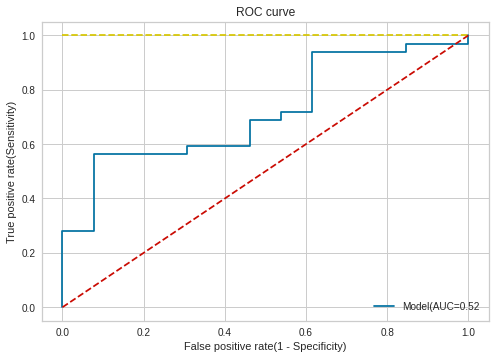

In [ ]:
import matplotlib.pyplot as plt

plt.plot(false_pos_rate, true_pos_rate, 'b', label = f'Model(AUC={roc_auc :.2f}')
plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.title('ROC curve')
plt.xlabel('False positive rate(1 - Specificity)')
plt.ylabel('True positive rate(Sensitivity)')
plt.legend(loc = 'best')

plt.show()

- 종합적으로 볼 때, 결과는.. 쓰레기임
- 모델 문제보다는 투표 여부 예측하기에 X 변수가 부족함

## section5. 다중분류

- 2022년 제4회 빅데이터분석기사 실기 시험에서 다중분류가 나왔습니다. 이전 회차들은 이중분류와 회귀였는데 다중분류가 나와 당황했다는 후기가 몇 개 있던 기억이 납니다. 저는 xgboost, RF 중 더 좋은 결과 썼습니다만,, 매번 새로운 형태의 문제를 내는 거 보면 다음은 또 다른 문제가 나오지 않을까 싶다가도 평가가 어려운 비지도 학습은 안 나올 것 같네요

(누가 볼까봐 존댓말 썼다가 아무도 안 보겠지 싶어서 반말 썼다가 아주 난리네)

- 데이터 설명
  - 다른 변수는 Fvote와 동일, target값만 지지정당인 (1,2,3,4) 4개 범주로 되어있음

In [ ]:
# 데이터 불러오기

import pandas as pd
data = pd.read_csv('Fvote.csv', encoding = 'utf-8')

In [ ]:
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [ ]:
# 데이터 확인

print(data.describe().T)

                    count      mean       std  min  25%  50%  75%  max
gender_female       211.0  0.341232  0.475251  0.0  0.0  0.0  1.0  1.0
gender_male         211.0  0.658768  0.475251  0.0  0.0  1.0  1.0  1.0
region_Chungcheung  211.0  0.080569  0.272819  0.0  0.0  0.0  0.0  1.0
region_Honam        211.0  0.090047  0.286930  0.0  0.0  0.0  0.0  1.0
region_Others       211.0  0.094787  0.293617  0.0  0.0  0.0  0.0  1.0
region_Sudo         211.0  0.597156  0.491636  0.0  0.0  1.0  1.0  1.0
region_Youngnam     211.0  0.137441  0.345131  0.0  0.0  0.0  0.0  1.0
edu                 211.0  1.867299  0.625963  1.0  1.0  2.0  2.0  3.0
income              211.0  2.208531  1.066424  1.0  1.0  2.0  3.0  4.0
age                 211.0  2.654028  0.872173  1.0  2.0  3.0  3.0  4.0
score_gov           211.0  3.056872  0.944451  1.0  3.0  3.0  4.0  5.0
score_progress      211.0  3.094787  0.961408  1.0  2.0  3.0  4.0  5.0
score_intention     211.0  2.910900  0.725078  1.0  2.4  3.0  3.4  5.0
vote  

In [ ]:
# 요약정보 확인

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender_female       211 non-null    int64  
 1   gender_male         211 non-null    int64  
 2   region_Chungcheung  211 non-null    int64  
 3   region_Honam        211 non-null    int64  
 4   region_Others       211 non-null    int64  
 5   region_Sudo         211 non-null    int64  
 6   region_Youngnam     211 non-null    int64  
 7   edu                 211 non-null    int64  
 8   income              211 non-null    int64  
 9   age                 211 non-null    int64  
 10  score_gov           211 non-null    int64  
 11  score_progress      211 non-null    int64  
 12  score_intention     211 non-null    float64
 13  vote                211 non-null    int64  
 14  parties             211 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 24.9 KB
None


### Feature, Target 분리

In [ ]:
X_data = data.drop(columns = ['parties', 'vote']) 
y_data = data[['parties']]


위 분석에서 까먹고 parties 안 뺏네요.. 귀찮으니 그냥 두겠습니다..

In [ ]:
print(X_data.shape, y_data.shape)

(211, 13) (211, 1)


### 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data,
                                                            random_state = 56,
                                                            stratify = y_data,
                                                            test_size = 0.2)

print(X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape)

(168, 13) (43, 13) (168, 1) (43, 1)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  random_state = 56,
                                                  stratify = y_train_val,
                                                  test_size = 0.2)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(134, 13) (34, 13) (134, 1) (34, 1)


### model fitting

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Grid search

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state = 56)

score = cross_val_score(model, X_train, y_train, cv = kfold)
print("5-fold mean acc.:", score.mean())

5-fold mean acc.: 0.5452991452991454


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid = param_grid,
                           cv = kfold, return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=56, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [ ]:
print(f"best parameter: {grid_search.best_params_}")
print(f"best score: {grid_search.best_score_}")

best parameter: {'C': 1}
best score: 0.5452991452991454


In [ ]:
# validation set score

print(f'Validation score: {grid_search.score(X_val, y_val)}')

Validation score: 0.5


### Random search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'C': randint(low = 0.001, high = 100)}

model = LogisticRegression()

rand_search = RandomizedSearchCV(model,
                                 param_distributions = param_distribs,
                                 cv = kfold,
                                 n_iter = 30,
                                 return_train_score = True)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=56, shuffle=True),
                   estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe501ad9250>},
                   return_train_score=True)

In [ ]:
print(f'best param: {rand_search.best_params_}')
print(f'best_score: {rand_search.best_score_}')

best param: {'C': 78}
best_score: 0.5452991452991452


In [ ]:
# validation set acc.

print(f'Validation set socre: {rand_search.score(X_val, y_val)}')

Validation set socre: 0.5


In [ ]:
from sklearn.metrics import f1_score

model = LogisticRegression(C = 1)
model.fit(X_train, y_train)